<a href="https://colab.research.google.com/github/TheGroxEmpire/board_game_simulator/blob/main/Board_Game_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math

In [132]:
def roll_dice():
  return random.randint(1,12)

class Player:
  def __init__(self):
    self.death = False
    self.stamina = 15
    self.resolve = 12
    self.agility = 7
    self.knowledge = 4
    self.perception = 6
    self.charisma = 3
    self.damage = 1
    self.combat_bonus = 2
    self.combat_stat = "stamina"
    self.combat = 0
    self.weapon_ability = "none"

  def equip_weapon(self, damage, combat_bonus, combat_stat, weapon_ability = "none"):
    self.damage = damage
    self.combat_bonus = combat_bonus
    self.combat_stat = combat_stat
    self.weapon_ability = weapon_ability

class Monster:
  def __init__(self, name, stamina, combat, stamina_damage, resolve_damage, stamina_combat, combat_bonus = 0, agility_damage = 0, knowledge_damage = 0, perception_damage = 0, charisma_damage = 0):
    self.death = False
    self.name = name
    self.stamina = stamina
    self.combat = combat
    self.stamina_damage = stamina_damage
    self.resolve_damage = resolve_damage
    self.stamina_combat = stamina_combat
    self.combat_bonus = combat_bonus
    self.agility_damage = agility_damage
    self.knowledge_damage = knowledge_damage
    self.perception_damage = perception_damage
    self.charisma_damage = charisma_damage

  def voice_of_the_apocalypse(self):
    self.stamina_damage += 1
    self.resolve_damage += 1
    self.agility_damage += 1
    self.knowledge_damage += 1
    self.perception_damage += 1
    self.charisma_damage += 1

  def refracted_king(self, n_exchange):
    if n_exchange % 2 == 0:
      self.stamina_damage = 0
      self.resolve_damage = 5
    else:
      self.stamina_damage = 5
      self.resolve_damage = 0

def hit_check(player_dice, enemy_dice):
  player_hit = player_dice <= player.combat and player_dice < 12 and enemy_dice <= player_dice or enemy_dice > enemy.combat or enemy_dice >= 12
  enemy_hit = enemy_dice <= enemy.combat and enemy_dice < 12 and enemy_dice > player_dice or player_dice > player.combat or player_dice >= 12
  return player_hit, enemy_hit
  

fists = 1, 2, "stamina"
thiefs_dagger = 2, 1, "agility", "surprise_attack"
thorned_claymore = 4, 1, "stamina"
poachers_shortbow = 2, 1, "perception", "true_strike"
worn_arming_sword = 2, 3, "stamina", "clash_of_steel"

bloated_corpse = "bloated_corpse", 8, 0, 1, 2, True, 2
spineless_thief = "spineless_thief", 5, 5, 1, 0, False
deep_lord_enchanter = "deep_lord_enchanter", 10, 9, 2, 2, False
deep_lord_council = "deep_lord_council", 12, 10, 2, 4, False
northern_invader = "northern_invader", 12, 0, 2, 0, True
six_eyed_wolf = "six_eyed_wolf", 7, 9, 2, 0, False
voice_of_the_apocalypse = "voice_of_the_apocalypse", 12, 12, 1, 1, False, 0, 1, 1, 1, 1
amber_chrysalis = "amber_chrysalis", 3, 7, 0, 0, False
horse_eater_wasp = "horse_eater_wasp", 4, 10, 2, 0, False, 0, 1
lordless_knight = "lordless_knight", 8, 0, 2, 0, True, 3
royal_wyvern = "royal_wyvern", 7, 0, 4, 0, True, 4
refracted_king = "refracted_king", 12, 0, 5, 0, True, 6
abandoned_sinner = "abandoned_sinner", 6, 9, 2, False, 0, 0, 0, 1
cthonian_eel = "cthonian_eel", 9, 0, 2, 0, True, 2
soul_hunter = "soul_hunter", 4, 9, 1, 0, False

six_eyed_wolf
Number of enemy's deaths: 8024
Number of player's deaths: 1976


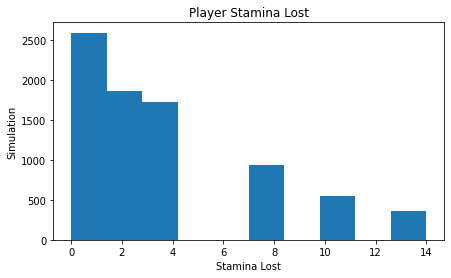

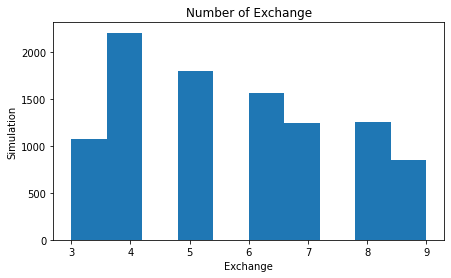

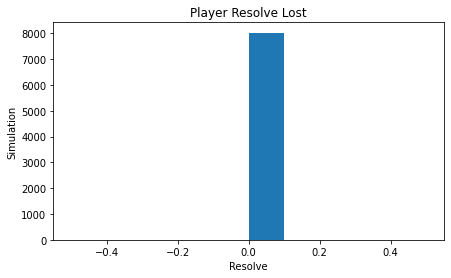

In [134]:
enemy_death_count = 0
player_death_count = 0
player_stamina_lost = []
number_of_exchange = []
player_resolve_lost = []

#insert player weapon below
weapon_name = worn_arming_sword

#insert enemy monster below
monster_name = six_eyed_wolf

for i in range(10000):
  player = Player()
  player.equip_weapon(*weapon_name)
  enemy = Monster(*monster_name)
  n_exchange = 0
  stamina_lost = 0
  while (enemy.death != True or player.death != True):
    if n_exchange % 2 == 0 and enemy.name == "voice_of_the_apocalypse":
      enemy.voice_of_the_apocalypse()
    elif n_exchange >= 3 and enemy.name == "amber_chrysalis":
      enemy = Monster(*horse_eater_wasp)
    elif enemy.name == "refracted_king":
      enemy.refracted_king(n_exchange)

    enemy_dice = roll_dice()
    player_dice = roll_dice()
    n_exchange += 1

    combat_stat = {"stamina": round(player.stamina / 2),
                   "agility": player.agility,
                   "perception": player.perception,
                   "knowledge": player.knowledge,}
    player.combat = combat_stat[player.combat_stat] + player.combat_bonus
    #print(f"Player combat_stat: {player.combat}")

    if enemy.stamina_combat:
      enemy.combat = enemy.stamina
      #print(f"Enemy combat_stat: {enemy.combat}")
    
    enemy.combat += enemy.combat_bonus
    player_hit, enemy_hit = hit_check(player_dice, enemy_dice)

    if player_hit and enemy.name == "deep_lord_council":
      enemy_dice = roll_dice()
      player_hit, enemy_hit = hit_check(player_dice, enemy_dice)
    elif enemy.name == "northern_invader" and enemy.stamina < 4:
      enemy.combat = 12
      enemy.stamina_combat = False
    elif n_exchange == 1 and enemy.name == "cthonian_eel":
      enemy_dice = roll_dice()
      player_hit, enemy_hit = hit_check(player_dice, enemy_dice)

    if enemy.name == "lordless_knight":
      enemy_hit = 0
      player.stamina -= enemy.stamina_damage

    if player_hit:
      enemy.stamina -= player.damage
      if (n_exchange == 1 and player.weapon_ability == "surprise_attack"):
          enemy.stamina -= player.damage
      elif (player_dice == 1 and player.weapon_ability == "true_strike"):
          enemy.stamina -= 1
      elif (player_dice == enemy_dice and player.weapon_ability == "clash_of_steel"):
          enemy.stamina -= 1
      
      if enemy.name == "royal_wyvern":
        enemy.stamina += 1
      #print(f"Enemy took damage with {enemy_dice} roll and {enemy.combat} dice. Player rolls {player_dice} and {player.combat} combat.")
    elif enemy_hit:
      if enemy.name == "six_eyed_wolf":
        player.stamina -= math.floor((15 - player.stamina) / 4)
      elif enemy.name == "soul_hunter":
        if player.resolve > 1:
          player.resolve = 1
        else:
          player.resolve = 0
      elif n_exchange == 1 and enemy.name == "cthonian_eel":
        player.stamina -= enemy.stamina_damage
      player.stamina -= enemy.stamina_damage
      player.resolve -= enemy.resolve_damage
      player.agility -= enemy.agility_damage
      player.knowledge -= enemy.knowledge_damage
      player.perception -= enemy.perception_damage
      player.charisma -= enemy.charisma_damage
      #print(f"Player took damage with {player_dice} roll and {player.combat} combat. Enemy rolls {enemy_dice} and {enemy.combat} combat.")
      

    if enemy.stamina <= 0:
      enemy.death = True
      if enemy.name == "bloated_corpse":
        player.stamina -= 1
      enemy_death_count += 1
      stamina_lost = 15 - player.stamina
      resolve_lost = 12 - player.resolve
      player_stamina_lost.append(stamina_lost)
      number_of_exchange.append(n_exchange)
      player_resolve_lost.append(resolve_lost)
      break
    elif player.stamina <= 0 or player.resolve <= 0:
      player.death = True
      player_death_count += 1
      number_of_exchange.append(n_exchange)
      break

print(enemy.name)
print(f"Number of enemy's deaths: {enemy_death_count}")
print(f"Number of player's deaths: {player_death_count}")

fig, ax1 = plt.subplots(figsize =(7, 4))
ax1.hist(player_stamina_lost)
ax1.set_title('Player Stamina Lost')
ax1.set_xlabel('Stamina Lost')
ax1.set_ylabel('Simulation')

fig, ax2 = plt.subplots(figsize =(7, 4))
ax2.hist(number_of_exchange)
ax2.set_title('Number of Exchange')
ax2.set_xlabel('Exchange')
ax2.set_ylabel('Simulation')
plt.show()

fig, ax3 = plt.subplots(figsize =(7, 4))
ax3.hist(player_resolve_lost)
ax3.set_title('Player Resolve Lost')
ax3.set_xlabel('Resolve')
ax3.set_ylabel('Simulation')
plt.show()